In [ ]:
! pip install prophet

  Using cached prophet-1.0.1.tar.gz (65 kB)
  Using cached cmdstanpy-0.9.68-py3-none-any.whl (49 kB)
  Using cached ujson-5.2.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (45 kB)
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640482 sha256=891d512e9e42cb75efb9083d362201aa87e1291116cd1b4d58b5f26680f681ef
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
import pandas as pd
from  prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} plotly

/bin/bash: conda: command not found


In [ ]:
covid_df = pd.read_csv("/content/us-states.csv")
covid_df = covid_df[covid_df["state"].str.contains("New York")]
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df = covid_df.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
covid_df['Deaths_per_day']=covid_df['deaths'] - covid_df['deaths'].shift(1)
covid_df['Cases_per_day']=covid_df['cases'] - covid_df['cases'].shift(1)

In [ ]:
covid_df.head(10)

,index,date,state,fips,cases,deaths,Deaths_per_day,Cases_per_day
0,246,2020-03-01,New York,36,1,0,NaN,NaN
1,261,2020-03-02,New York,36,1,0,0.0,0.0
2,276,2020-03-03,New York,36,2,0,0.0,1.0
3,293,2020-03-04,New York,36,11,0,0.0,9.0
4,313,2020-03-05,New York,36,22,0,0.0,11.0
5,338,2020-03-06,New York,36,44,0,0.0,22.0
6,369,2020-03-07,New York,36,89,0,0.0,45.0
7,404,2020-03-08,New York,36,106,0,0.0,17.0
8,440,2020-03-09,New York,36,142,0,0.0,36.0
9,478,2020-03-10,New York,36,173,0,0.0,31.0


In [ ]:
covid_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           802 non-null    int64         
 1   date            802 non-null    datetime64[ns]
 2   state           802 non-null    object        
 3   fips            802 non-null    int64         
 4   cases           802 non-null    int64         
 5   deaths          802 non-null    int64         
 6   Deaths_per_day  801 non-null    float64       
 7   Cases_per_day   801 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 50.2+ KB


In [ ]:
covid_df = covid_df[covid_df["state"].str.contains("New York")]
covid_df = covid_df.drop('fips', axis=1)
covid_df = covid_df.drop('index', axis=1)

In [ ]:
covid_df.head(10)

,date,state,cases,deaths,Deaths_per_day,Cases_per_day
0,2020-03-01,New York,1,0,NaN,NaN
1,2020-03-02,New York,1,0,0.0,0.0
2,2020-03-03,New York,2,0,0.0,1.0
3,2020-03-04,New York,11,0,0.0,9.0
4,2020-03-05,New York,22,0,0.0,11.0
5,2020-03-06,New York,44,0,0.0,22.0
6,2020-03-07,New York,89,0,0.0,45.0
7,2020-03-08,New York,106,0,0.0,17.0
8,2020-03-09,New York,142,0,0.0,36.0
9,2020-03-10,New York,173,0,0.0,31.0


In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 801
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            802 non-null    datetime64[ns]
 1   state           802 non-null    object        
 2   cases           802 non-null    int64         
 3   deaths          802 non-null    int64         
 4   Deaths_per_day  801 non-null    float64       
 5   Cases_per_day   801 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 43.9+ KB


In [ ]:
#NewYork = pd.pivot_table(covid_df,values = ["Deaths_per_day","Cases_per_day"], index = "date", aggfunc = max)
#NewYork["Mortality Rate"]=NewYork['Deaths_per_day']*100/NewYork['Cases_per_day']
#NewYork.style.background_gradient(cmap ="cubehelix ")

In [ ]:
covid_df2 = pd.read_csv("/content/us_state_vaccinations.csv")
covid_df2 = covid_df2[covid_df2["location"].str.contains("New York")]
covid_df2['location'] = covid_df2['location'].replace(['New York State'],'New York')
covid_df2.rename(columns = {'location':'state'}, inplace = True)
covid_df2['date'] = pd.to_datetime(covid_df2['date'])
covid_df2 = covid_df2.reset_index()
covid_df2 = covid_df2.drop('index', axis=1)
covid_df2.head(10)


,date,state,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,New York,579532.0,1622100.0,543014.0,0.19,2.98,36422.0,2.79,8.34,NaN,NaN,NaN,0.357,NaN,NaN
1,2021-01-13,New York,632473.0,1796850.0,587865.0,0.23,3.25,44512.0,3.02,9.24,52941.0,52941.0,2721.0,0.352,NaN,NaN
2,2021-01-14,New York,688576.0,1872625.0,617596.0,NaN,3.54,NaN,3.17,9.63,56103.0,54522.0,2803.0,0.368,NaN,NaN
3,2021-01-15,New York,757466.0,1884325.0,671311.0,0.38,3.89,73523.0,3.45,9.69,68890.0,59311.0,3049.0,0.402,NaN,NaN
4,2021-01-16,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59662.0,3067.0,NaN,NaN,NaN
5,2021-01-17,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59872.0,3078.0,NaN,NaN,NaN
6,2021-01-18,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60012.0,3085.0,NaN,NaN,NaN
7,2021-01-19,New York,1000319.0,1884325.0,884908.0,0.53,5.14,102187.0,4.55,9.69,NaN,60112.0,3090.0,0.531,NaN,NaN
8,2021-01-20,New York,1046490.0,2057875.0,926339.0,0.55,5.38,106821.0,4.76,10.58,46171.0,59145.0,3040.0,0.509,NaN,NaN
9,2021-01-21,New York,1116441.0,2213975.0,982183.0,0.62,5.74,120801.0,5.05,11.38,69951.0,61124.0,3142.0,0.504,NaN,NaN


In [ ]:
covid_df = pd.merge(covid_df, covid_df2, how='outer')
covid_df.head()

,date,state,cases,deaths,Deaths_per_day,Cases_per_day,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2020-03-01,New York,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-02,New York,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-03,New York,2,0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-04,New York,11,0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-05,New York,22,0,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import files

with open('covid_df.csv', 'w') as f:
  f.write(covid_df.to_csv())

files.download('covid_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Will now compare forecasted data from start of mask mandate without considering the mandate for one month and compare it to historical data within the same time period

In [ ]:
mask = (covid_df['date'] > '2020-4-17') & (covid_df['date'] <= '2020-5-17')
newdf= covid_df.loc[mask]
newdf = newdf.reset_index()
deaths = newdf.iloc[:,[1,5]]
mask = (covid_df['date'] > '2020-3-1') & (covid_df['date'] <= '2020-4-17')
newdf2= covid_df.loc[mask]
newdf2 = newdf2.reset_index()
base = newdf2.iloc[:,[1,5]]
base= base.rename(columns={'date':'ds','Deaths_per_day':'y'})

In [ ]:
#prophet mmodel
m = Prophet(interval_width=0.95)
m.fit(base)
p_deaths= m.make_future_dataframe(periods=30)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = m.predict(p_deaths)
forecast = forecast.round(0)
forecast[['ds', 'yhat']].tail

<bound method NDFrame.tail of            ds    yhat
0  2020-03-02  -265.0
1  2020-03-03  -198.0
2  2020-03-04  -203.0
3  2020-03-05  -214.0
4  2020-03-06  -172.0
..        ...     ...
72 2020-05-13  1669.0
73 2020-05-14  1659.0
74 2020-05-15  1700.0
75 2020-05-16  1760.0
76 2020-05-17  1747.0

[77 rows x 2 columns]>

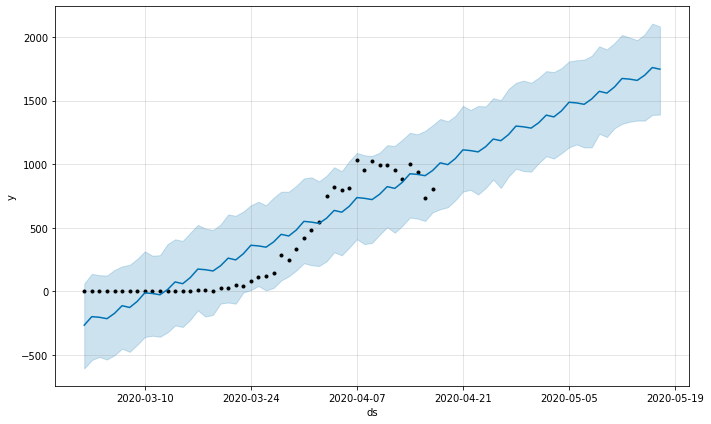

In [ ]:
deaths_forecast_plot = m.plot(forecast)

In [ ]:
f_mask =  (forecast['ds'] > '2020-4-17') & (forecast['ds'] <= '2020-5-17')
forecast= forecast.loc[f_mask]
forecast = forecast.reset_index()
forecast_final = pd.merge(forecast, deaths,  left_index=True, right_index=True)


In [ ]:
from google.colab import files

with open('Forecastcovid_df.csv', 'w') as f:
  f.write(forecast_final.to_csv())

files.download('Forecastcovid_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sys
print(sys.executable)

Visualization: https://prod-useast-a.online.tableau.com/t/mbarron/views/COVID19VIZ/Dashboard1?:showAppBanner=false&:display_count=n&:showVizHome=n&:origin=viz_share_link